<a href="https://colab.research.google.com/github/bandiamithsreenivasareddy/ml-lab/blob/main/ML_lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Centroid Class 0: [1.37447458e+01 2.01067797e+00 2.45559322e+00 1.70372881e+01
 1.06338983e+02 2.84016949e+00 2.98237288e+00 2.90000000e-01
 1.89932203e+00 5.52830508e+00 1.06203390e+00 3.15779661e+00
 1.11571186e+03]
Centroid Class 1: [1.22787324e+01 1.93267606e+00 2.24478873e+00 2.02380282e+01
 9.45492958e+01 2.25887324e+00 2.08084507e+00 3.63661972e-01
 1.63028169e+00 3.08661972e+00 1.05628169e+00 2.78535211e+00
 5.19507042e+02]
Standard Deviation Class 0: [4.58192306e-01 6.82688763e-01 2.25232619e-01 2.52465123e+00
 1.04095949e+01 3.36076522e-01 3.94110623e-01 6.94530691e-02
 4.08601851e-01 1.22803157e+00 1.15491282e-01 3.54037572e-01
 2.19635449e+02]
Standard Deviation Class 1: [5.34162315e-01 1.00839149e+00 3.13237790e-01 3.32609682e+00
 1.66350967e+01 5.41506894e-01 7.00713412e-01 1.23085215e-01
 5.97812849e-01 9.18392570e-01 2.01502608e-01 4.93064093e-01
 1.56100173e+02]
Interclass Distance: 596.3379580251424


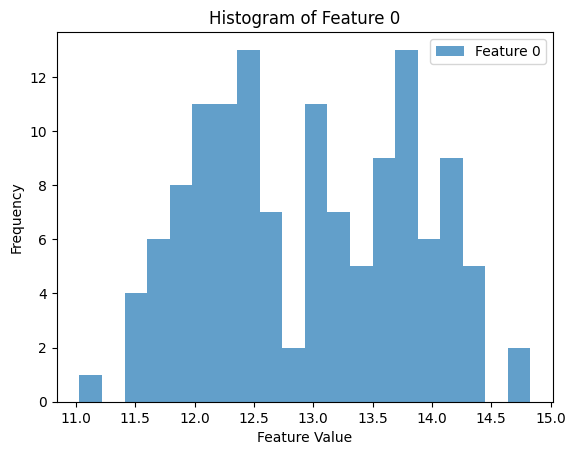

Mean of Feature 0: 12.944076923076922
Variance of Feature 0: 0.7838349171597635


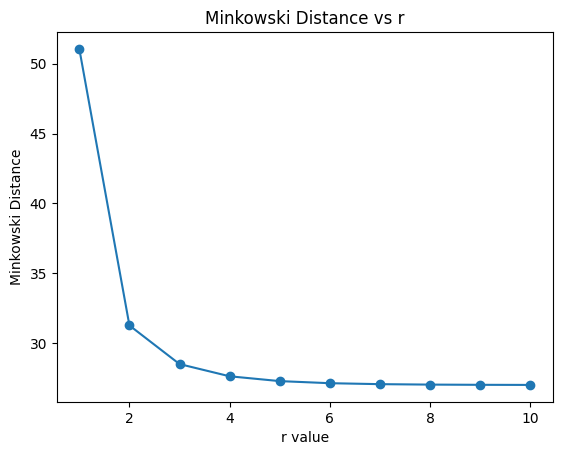

kNN (k=3) Accuracy: 0.8974358974358975
Predictions: [0 0 0 0 1 0 0 1 1 0 0 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1
 0 1]


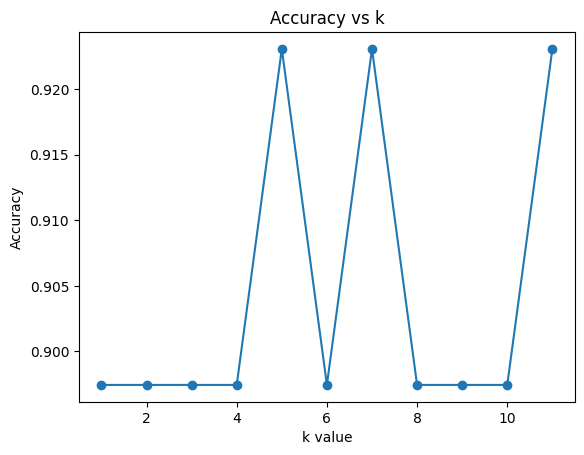

Confusion Matrix:
[[20  0]
 [ 4 15]]


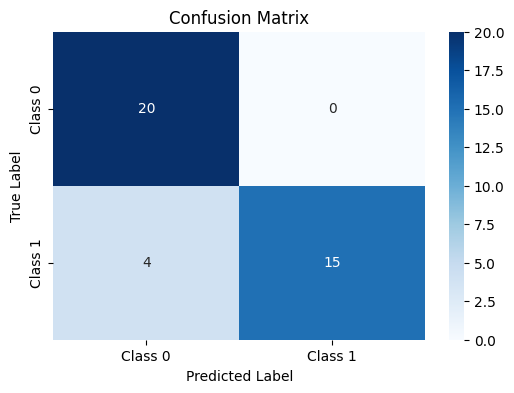

Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        20
           1       1.00      0.79      0.88        19

    accuracy                           0.90        39
   macro avg       0.92      0.89      0.90        39
weighted avg       0.91      0.90      0.90        39



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from scipy.spatial.distance import minkowski

# Load the wine dataset
data = load_wine()
X, y = data.data, data.target

# Select only two classes for binary classification
X = X[y != 2]
y = y[y != 2]

# A1: Intraclass Spread and Interclass Distance
class_0 = X[y == 0]
class_1 = X[y == 1]

centroid_0 = np.mean(class_0, axis=0)
centroid_1 = np.mean(class_1, axis=0)

std_0 = np.std(class_0, axis=0)
std_1 = np.std(class_1, axis=0)

interclass_distance = np.linalg.norm(centroid_0 - centroid_1)

print("Centroid Class 0:", centroid_0)
print("Centroid Class 1:", centroid_1)
print("Standard Deviation Class 0:", std_0)
print("Standard Deviation Class 1:", std_1)
print("Interclass Distance:", interclass_distance)

# A2: Histogram for a Feature
feature_index = 0  # Choosing first feature
plt.hist(X[:, feature_index], bins=20, alpha=0.7, label='Feature 0')
plt.xlabel('Feature Value')
plt.ylabel('Frequency')
plt.title('Histogram of Feature 0')
plt.legend()
plt.show()

mean_feature = np.mean(X[:, feature_index])
variance_feature = np.var(X[:, feature_index])
print("Mean of Feature 0:", mean_feature)
print("Variance of Feature 0:", variance_feature)

# A3: Minkowski Distance Plot
vec1, vec2 = X[0], X[1]
minkowski_distances = [minkowski(vec1, vec2, p=r) for r in range(1, 11)]
plt.plot(range(1, 11), minkowski_distances, marker='o')
plt.xlabel('r value')
plt.ylabel('Minkowski Distance')
plt.title('Minkowski Distance vs r')
plt.show()

# A4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# A5: Train kNN Classifier (k=3)
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

# A6: Test Accuracy
accuracy = neigh.score(X_test, y_test)
print("kNN (k=3) Accuracy:", accuracy)

# A7: Predictions
predictions = neigh.predict(X_test)
print("Predictions:", predictions)

# A8: Vary k from 1 to 11 and Compare Accuracy
k_values = range(1, 12)
accuracies = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    acc = knn.score(X_test, y_test)
    accuracies.append(acc)

plt.plot(k_values, accuracies, marker='o')
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k')
plt.show()

# A9: Confusion Matrix & Performance Metrics
y_pred = neigh.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred))
